<a href="https://colab.research.google.com/github/2303a51863/NLP/blob/main/Legal_Text_Classification-Assignment-.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ASSIGNMENT-Legal_Text_Classification

H.No-2303A51863

B-13

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
import string
df = pd.read_csv("legal_text_classification.csv")
print(df)

         case_id   case_outcome  \
0          Case1          cited   
1          Case2          cited   
2          Case3          cited   
3          Case4          cited   
4          Case5          cited   
...          ...            ...   
24980  Case25203          cited   
24981  Case25204          cited   
24982  Case25205          cited   
24983  Case25206  distinguished   
24984  Case25207  distinguished   

                                              case_title  \
0      Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...   
1      Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...   
2      Colgate Palmolive Co v Cussons Pty Ltd (1993) ...   
3      Dais Studio Pty Ltd v Bullett Creative Pty Ltd...   
4      Dr Martens Australia Pty Ltd v Figgins Holding...   
...                                                  ...   
24980  Reches Pty Ltd v Tadiran Pty Ltd (1998) 85 FCR...   
24981  Sir Lindsay Parkinson &amp; Co Ltd v Triplan L...   
24982  Spiel v Commodity Brokers Austra

In [ ]:
print(df['case_title'].value_counts())

case_title
minister immigration ethnic affairs v wu liang 1996 hca 6 1996 185 clr 259                   72
general steel industries inc v commissioner railways nsw 1964 hca 69 1964 112 clr 125        47
minister aboriginal affairs v pekowallsend ltd 1986 hca 40 1986 162 clr 24                   40
kioa v west 1985 hca 81 1985 159 clr 550                                                     37
saap v minister immigration multicultural indigenous affairs 2005 hca 24 2005 215 alr 162    36
                                                                                             ..
parramatta city council v pesell 1972 hca 59 1972 128 clr 305                                 1
attorneygeneral new south wales v quin 1990 hca 21 1990 170 clr 1                             1
corporation city einfield v development assistance commission 2000 hca 5 2000 199 clr 135     1
videto v minister immigration ethnic affairs 1985 8 fcr 167                                   1
detsongjarus v minister immig

In [ ]:
def preprocess_text(text):
  text=str(text).lower()
  text = text.translate(str.maketrans('','',string.punctuation))
  text = re.sub(r'[^a-z0-9\s]', '', text)
  tokens=word_tokenize(text)
  stop_words=set(stopwords.words("english"))
  tokens=[word for word in tokens if word not in stop_words]
  return " ".join(tokens)


In [1]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df['case_title'] = df['case_title'].astype(str).apply(preprocess_text)
print(df['case_title'].head())

0    alpine hardwood aust pty ltd v hardys pty ltd ...
1        black v lipovac 1998 fca 699 1998 217 alr 386
2    colgate palmolive co v cussons pty ltd 1993 47...
3    dais studio pty ltd v bullett creative pty ltd...
4    dr martens australia pty ltd v figgins holding...
Name: case_title, dtype: object


case_outcome
affirmed          8.761062
applied          12.144199
approved         11.287037
cited            11.522956
considered       11.561332
discussed        11.690430
distinguished    11.736842
followed         11.742465
referred to      11.578923
related          11.530973
Name: doc_len, dtype: float64


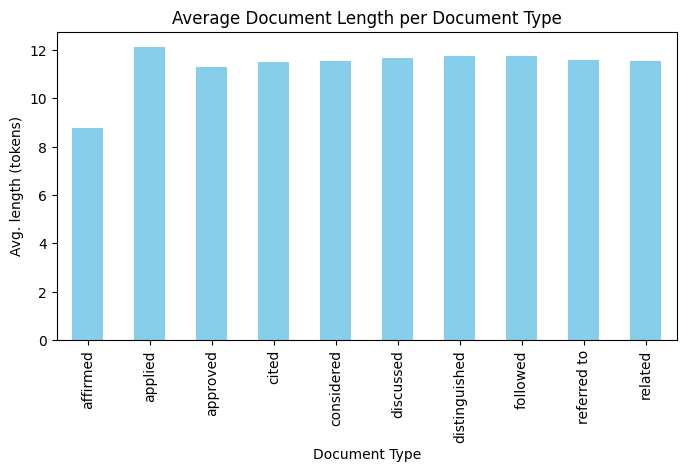

In [ ]:
import matplotlib.pyplot as plt
avg_len = df.groupby("case_outcome")["doc_len"].mean()
print(avg_len)
avg_len.plot(kind="bar", figsize=(8,4), color="skyblue")
plt.title("Average Document Length per Document Type")
plt.ylabel("Avg. length (tokens)")
plt.xlabel("Document Type")
plt.show()


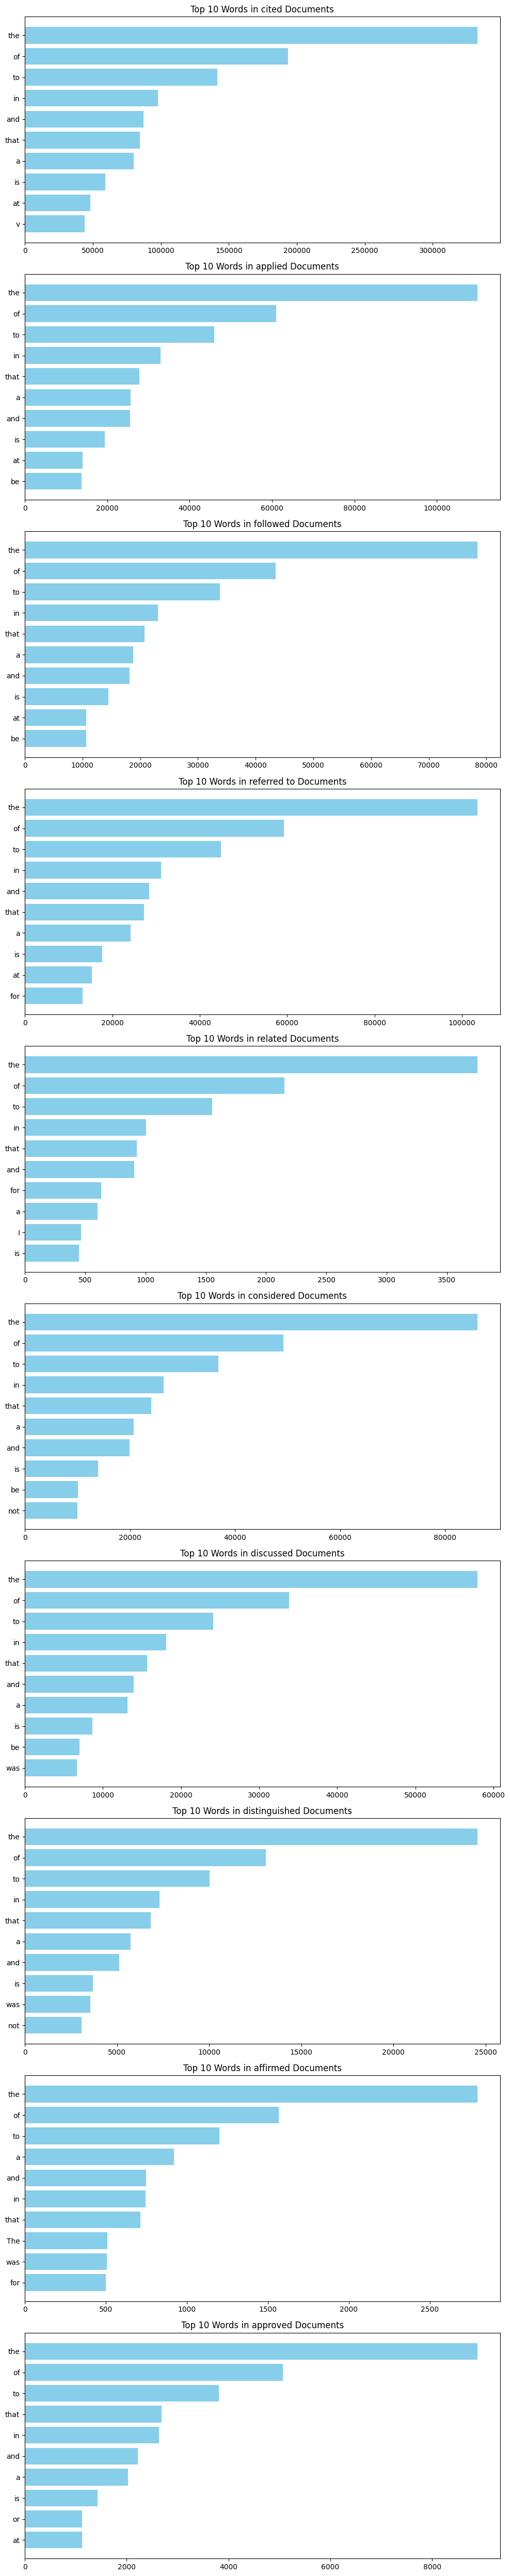

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
categories = df['case_outcome'].unique()

fig, axes = plt.subplots(len(categories), 1, figsize=(10, 5*len(categories)))

for i, cat in enumerate(categories):
    texts = " ".join(df[df['case_outcome'] == cat]['case_text'].astype(str))
    words = texts.split()
    common_words = Counter(words).most_common(10)
    labels, values = zip(*common_words)
    axes[i].barh(labels, values, color="skyblue")
    axes[i].set_title(f"Top 10 Words in {cat} Documents")
    axes[i].invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,2), stop_words="english")
X = cv.fit_transform(df["case_text"].astype(str))
print("Shape of matrix (docs × features):", X.shape)
print("Sample vocabulary:", list(cv.get_feature_names_out()[:20]))

Shape of matrix (docs × features): (24985, 1249102)
Sample vocabulary: ['00', '00 00', '00 101', '00 11', '00 12', '00 13', '00 14', '00 16', '00 17', '00 178', '00 2003', '00 2004', '00 2005', '00 207', '00 22', '00 24', '00 250', '00 27', '00 29', '00 299']


In [ ]:
from collections import Counter
import numpy as np
vocab_size = len(cv.get_feature_names_out())
print("Vocabulary size:", vocab_size)
word_counts = np.asarray(X.sum(axis=0)).flatten()
vocab = cv.get_feature_names_out()
freqs = dict(zip(vocab, word_counts))
bigrams = {k: v for k, v in freqs.items() if len(k.split()) == 2}
top_bigrams = Counter(bigrams).most_common(10)

print("\nTop 10 Bigrams:")
for bigram, count in top_bigrams:
    print(bigram, ":", count)


Vocabulary size: 1249102

Top 10 Bigrams:
minister immigration : 10547
immigration multicultural : 6271
legal advice : 5828
federal court : 4999
commissioner taxation : 4870
high court : 4818
indigenous affairs : 4463
multicultural indigenous : 3641
ex parte : 3286
legal professional : 3187
